#### This exploratory notebook is used to explore the enriched dataset, and gather insights and observations for training

In [90]:
#Imports
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [91]:
with open('../config.json', 'r') as config_file:
    config = json.load(config_file)

enriched_nhanes = config.get('enriched_processed')
enriched_nhanes = pd.read_csv(enriched_nhanes)
enriched_nhanes.head()

,age_group,ever_asthma,current_asthma,asthma_attack_past_year,asthma_emergency_past_year,any_liver_condition,cancer_malignancy,num_presc_taken,polypharmacy_risk,confidence,health_score,ade_likelihood,avg_drug_risk,composite_risk,composite_risk_log
0,Young Adult,2.0,0.0,0.0,0.0,0.0,2.0,1.0,Low,3064,4,0.255094,0.004738,1.303459,0.834412
1,Elderly,2.0,0.0,0.0,0.0,0.0,2.0,2.0,Low,1996,4,0.248222,0.002096,1.299917,0.832873
2,Young Adult,1.0,1.0,1.0,1.0,0.0,2.0,3.0,Low,3064,3,0.255094,0.004738,1.003459,0.694875
3,Elderly,2.0,0.0,0.0,0.0,0.0,2.0,2.0,Low,1996,4,0.248222,0.002096,1.299917,0.832873
4,Elderly,1.0,1.0,1.0,1.0,0.0,1.0,5.0,Moderate,183,0,0.031180,0.000456,0.012609,0.012530


In [92]:
#Overview
enriched_nhanes.info()
enriched_nhanes.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_group                   276 non-null    object 
 1   ever_asthma                 276 non-null    float64
 2   current_asthma              276 non-null    float64
 3   asthma_attack_past_year     276 non-null    float64
 4   asthma_emergency_past_year  276 non-null    float64
 5   any_liver_condition         276 non-null    float64
 6   cancer_malignancy           276 non-null    float64
 7   num_presc_taken             276 non-null    float64
 8   polypharmacy_risk           276 non-null    object 
 9   confidence                  276 non-null    int64  
 10  health_score                276 non-null    int64  
 11  ade_likelihood              276 non-null    float64
 12  avg_drug_risk               276 non-null    float64
 13  composite_risk              276 non

,ever_asthma,current_asthma,asthma_attack_past_year,asthma_emergency_past_year,any_liver_condition,cancer_malignancy,num_presc_taken,confidence,health_score,ade_likelihood,avg_drug_risk,composite_risk,composite_risk_log
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1.829710,0.202899,0.177536,0.228261,0.108696,1.702899,2.500000,2040.713768,3.597826,0.209121,0.002539,1.163758,0.755683
std,0.395412,0.506818,0.533601,0.787677,0.454229,0.659580,1.540956,1028.440953,1.096040,0.098989,0.001538,0.342267,0.192489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,0.011920,0.000076,0.012609,0.012530
25%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1460.000000,4.000000,0.116322,0.000843,1.212609,0.794172
50%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1996.000000,4.000000,0.248222,0.002096,1.299917,0.832873
75%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2844.000000,4.000000,0.299808,0.003429,1.320952,0.841977
max,2.000000,2.000000,2.000000,9.000000,2.000000,2.000000,9.000000,3064.000000,5.000000,0.299808,0.004738,1.620952,0.963538


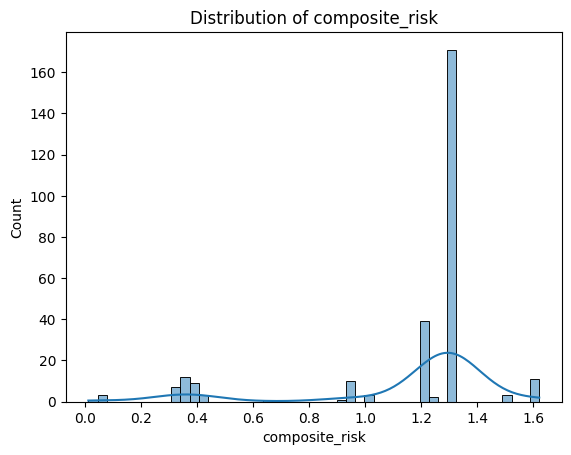

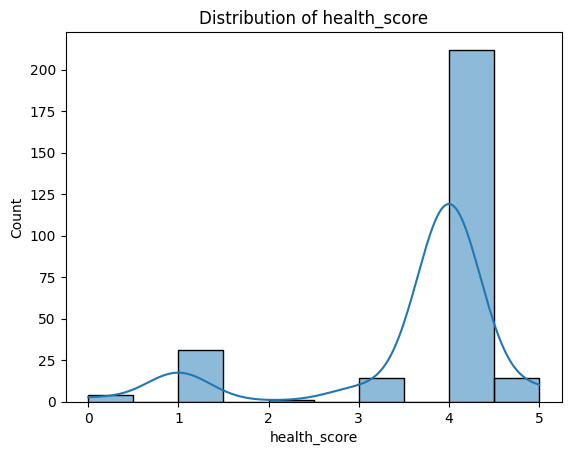

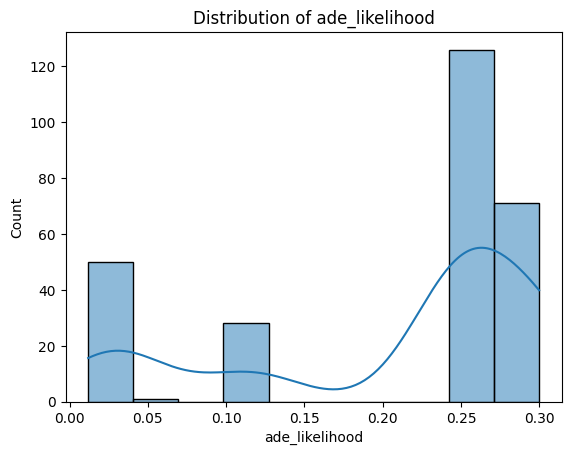

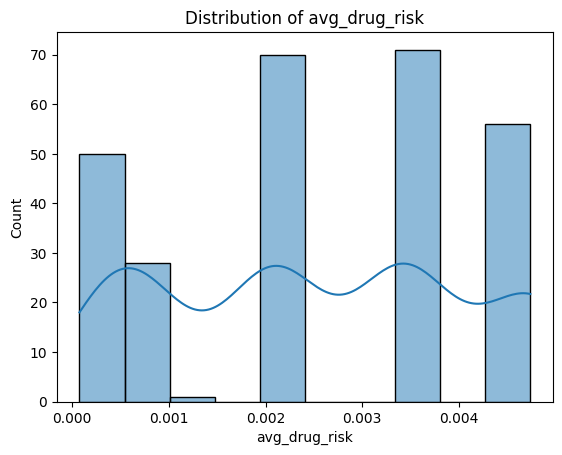

In [93]:
#Distribution Analysis
for column in [
    'composite_risk',
    'health_score',
    'ade_likelihood',
    'avg_drug_risk',
]:
    sns.histplot(enriched_nhanes[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

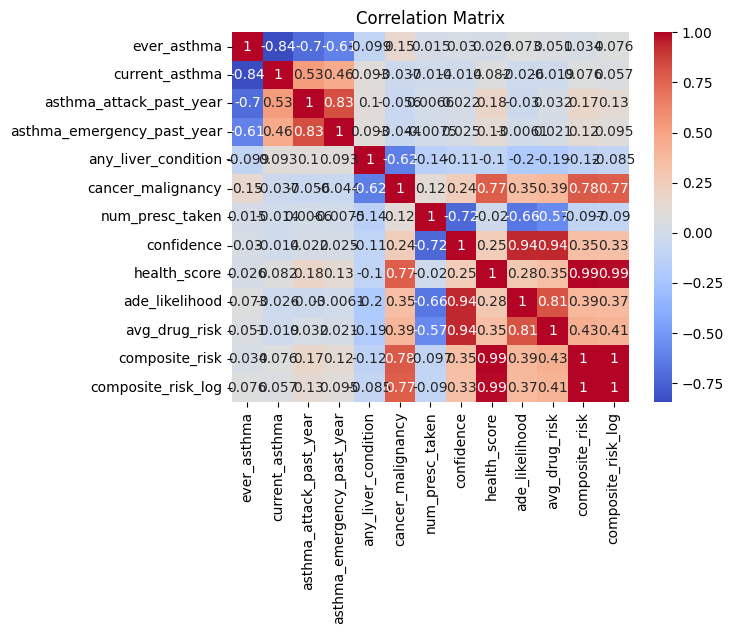

In [94]:
#Correlation Analysis
# Filter numeric columns only
numeric_columns = enriched_nhanes.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


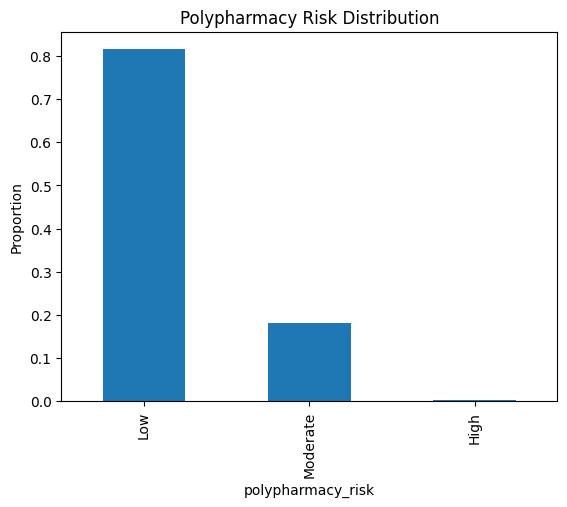

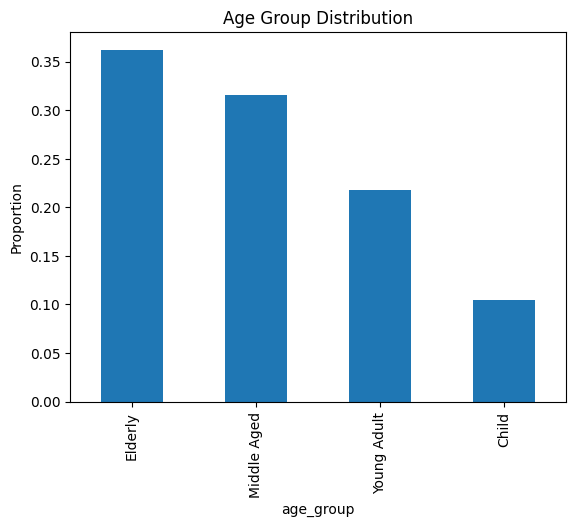

In [95]:
#Class Imbalance
# Polypharmacy Risk Distribution
enriched_nhanes['polypharmacy_risk'].value_counts(normalize=True).plot(kind='bar')
plt.title("Polypharmacy Risk Distribution")
plt.ylabel("Proportion")
plt.show()

# Age Group Distribution
enriched_nhanes['age_group'].value_counts(normalize=True).plot(kind='bar')
plt.title("Age Group Distribution")
plt.ylabel("Proportion")
plt.show()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_group                   276 non-null    object 
 1   ever_asthma                 276 non-null    float64
 2   current_asthma              276 non-null    float64
 3   asthma_attack_past_year     276 non-null    float64
 4   asthma_emergency_past_year  276 non-null    float64
 5   any_liver_condition         276 non-null    float64
 6   cancer_malignancy           276 non-null    float64
 7   num_presc_taken             276 non-null    float64
 8   polypharmacy_risk           276 non-null    object 
 9   confidence                  276 non-null    int64  
 10  health_score                276 non-null    int64  
 11  ade_likelihood              276 non-null    float64
 12  avg_drug_risk               276 non-null    float64
 13  composite_risk   

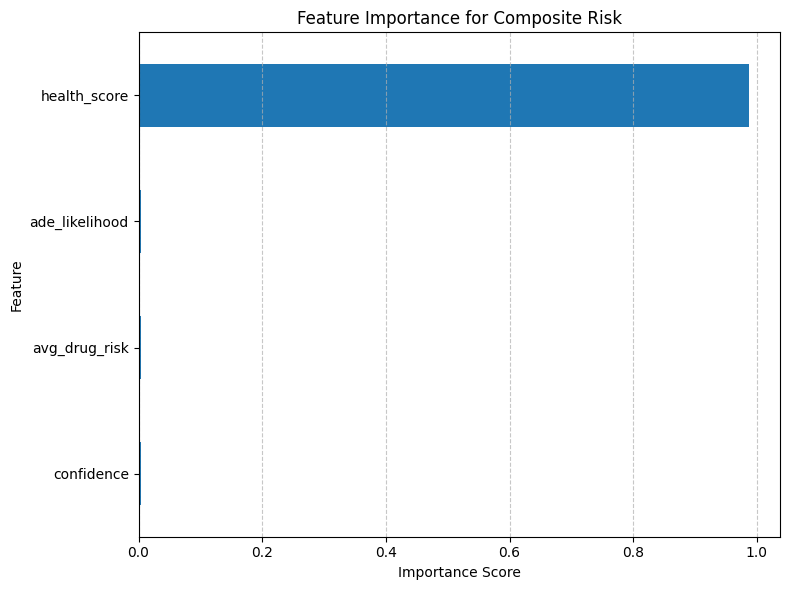


Feature importance saved to 'feature_importances.csv'.


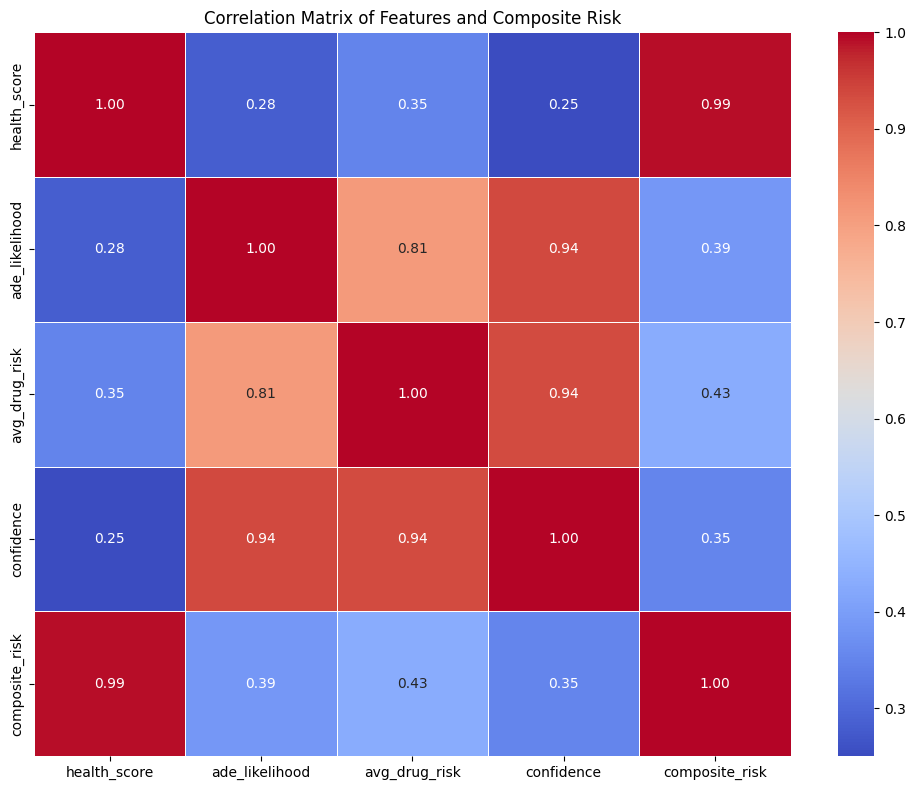


Correlation matrix saved to 'correlation_matrix.csv'.
Feature importance and correlation analysis complete. Review the charts and saved files for insights.


In [116]:

# Validate the dataset
print("Dataset Overview:")
print(enriched_nhanes.info())
print("\nFeature Distributions:")
print(enriched_nhanes.describe())

# Define features and target variable for feature importance assessment
features = [
    'health_score',  # Normalized health score from NHANES
    'ade_likelihood',  # Weighted ADE likelihood from FAERS
    'avg_drug_risk',  # Weighted average drug risk from FAERS
    'confidence',  # Confidence indicator based on FAERS report counts
]
target = 'composite_risk'  # Composite risk score derived from features

# Check for missing values in the features and target
if enriched_nhanes[features + [target]].isna().any().any():
    print("Error: Missing values detected in the dataset. Please handle them before training.")
    exit()

# Train a Random Forest model for feature importance analysis
model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=5,  # Restrict tree depth for better interpretability
    random_state=42
)
model.fit(enriched_nhanes[features], enriched_nhanes[target])

# Assess feature importance
feature_importances = pd.Series(model.feature_importances_, index=features)

# Plot feature importance
plt.figure(figsize=(8, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance for Composite Risk")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save feature importances to a CSV
feature_importances.to_csv("feature_importances.csv", index=True)
print("\nFeature importance saved to 'feature_importances.csv'.")

# Correlation matrix to explore relationships between features and target
correlation_matrix = enriched_nhanes[features + [target]].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features and Composite Risk")
plt.tight_layout()
plt.show()

# Save correlation matrix to a CSV
correlation_matrix.to_csv("correlation_matrix.csv")
print("\nCorrelation matrix saved to 'correlation_matrix.csv'.")

print("Feature importance and correlation analysis complete. Review the charts and saved files for insights.")


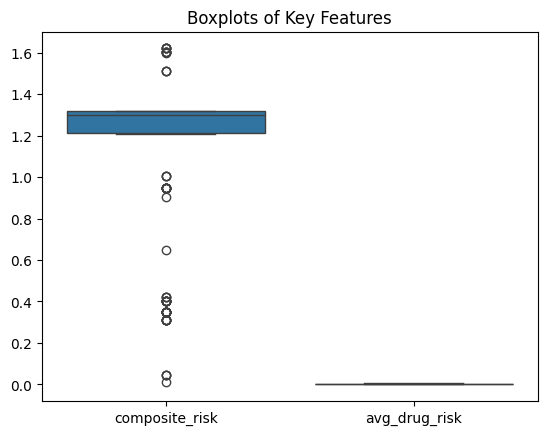

In [99]:
#Outlier Detection
sns.boxplot(
    data=enriched_nhanes[
        ['composite_risk', 'avg_drug_risk']
    ]
)
plt.title("Boxplots of Key Features")
plt.show()

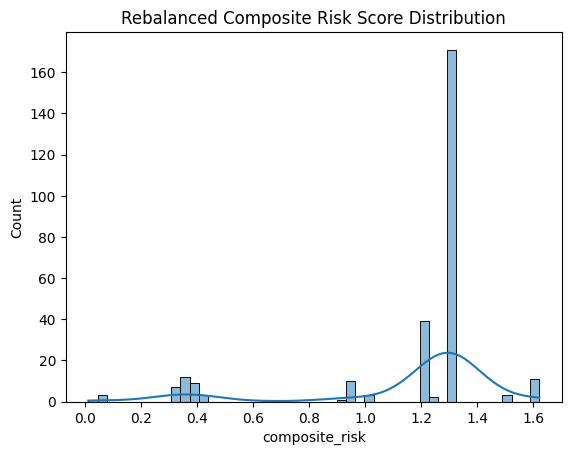

In [101]:
#Target Variable Analysis
#Ensure if appropriate for predictive modeling
sns.histplot(enriched_nhanes['composite_risk'], kde=True)
plt.title("Rebalanced Composite Risk Score Distribution")
plt.show()



In [103]:
#Group Level Insights
#Explore aggregated metrics by groups
group_metrics = enriched_nhanes.groupby(['age_group', 'polypharmacy_risk'])[
    ['composite_risk', 'ade_likelihood']
].mean()
print("Group Level Metrics:")
print(group_metrics)


Group Level Metrics:
                               composite_risk  ade_likelihood
age_group   polypharmacy_risk                                
Child       Low                      0.603925        0.116322
            Moderate                 0.904791        0.011920
Elderly     High                     1.226954        0.066552
            Low                      1.188489        0.248222
            Moderate                 0.995368        0.031180
Middle Aged Low                      1.304051        0.299808
            Moderate                 1.173455        0.027085
Young Adult Low                      1.314173        0.255094
            Moderate                 1.284774        0.024300


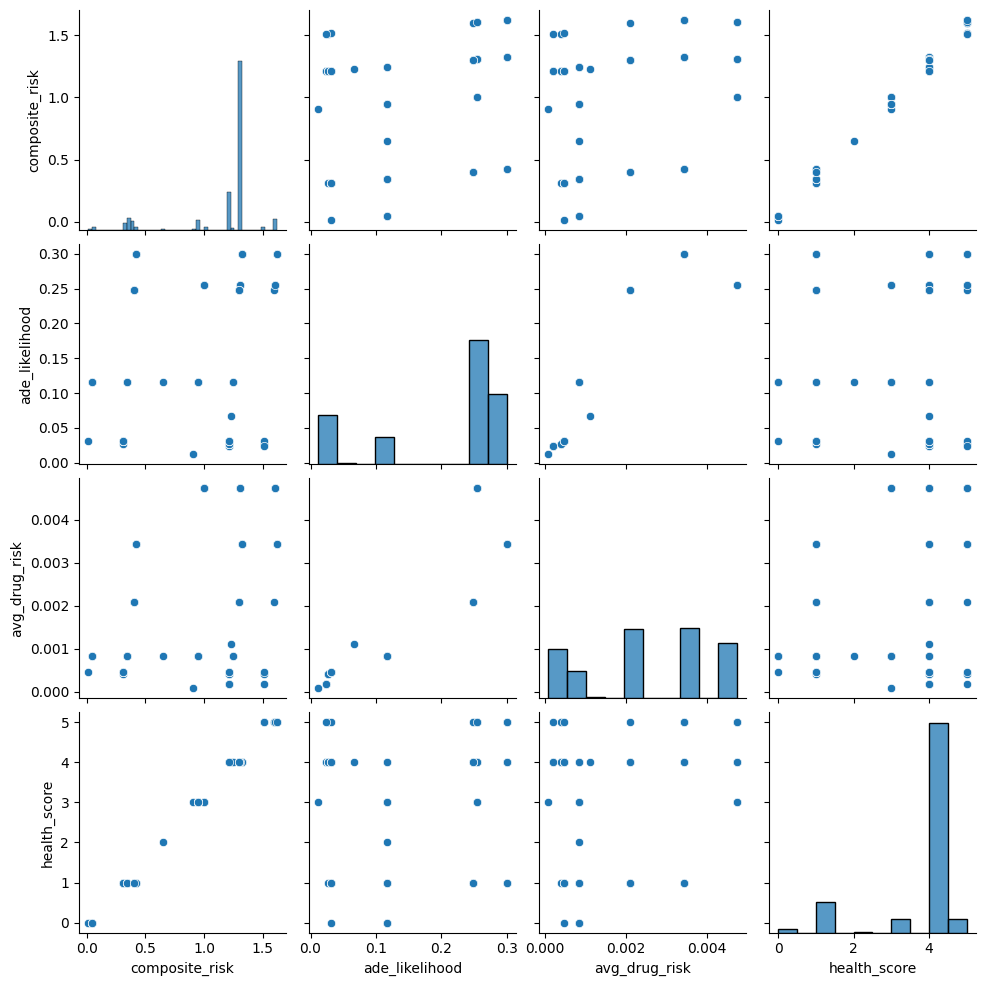

In [104]:
#Visualize Relationships 
#Relation between key features and target variable
sns.pairplot(
    enriched_nhanes,
    vars=[
        'composite_risk',
        'ade_likelihood',
        'avg_drug_risk',
        'health_score',
    ],
)
plt.show()


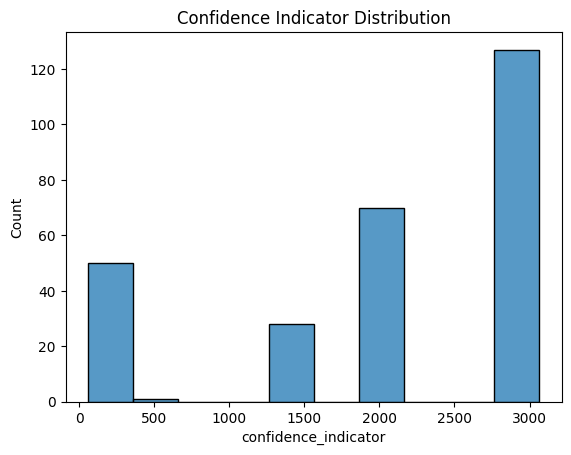

age_group    polypharmacy_risk
Child        Low                  1460.0
             Moderate               60.0
Elderly      High                  366.0
             Low                  1996.0
             Moderate              183.0
Middle Aged  Low                  2844.0
             Moderate              183.0
Young Adult  Low                  3064.0
             Moderate              117.0
Name: confidence_indicator, dtype: float64


In [ ]:
sns.histplot(enriched_nhanes['confidence_indicator'], kde=False)
plt.title("Confidence Indicator Distribution")
plt.show()
group_confidence = enriched_nhanes.groupby(['age_group', 'polypharmacy_risk'])['confidence_indicator'].mean()
print(group_confidence)